# 参考記事
### ・ナイキスト周波数、サンプリング周波数
https://algorithm.joho.info/signal/fourier-transform-sampling-frequency-nyquist-frequency/  

### ・コード参考  
https://blog.mktia.com/discrete-fourier-transform-in-python/  

### ・サンプリングレート  
http://www.image.med.osaka-u.ac.jp/member/yoshi/ouec_lecture/digital_processing/handout/Sampling_theorem.pdf

In [74]:
from modules.data_modify import *
from modules.load import *
from modules.lstm import *
sns.set()
from tensorflow.keras.models import load_model

In [75]:
df_dan = load("table_test.csv")
df_sponge = load("sponge_5V1.csv")

In [76]:
y_data = df_dan.iloc[:, 0]
df_dan = df_dan.iloc[7:,:]
df_dan = df_dan.astype("float32")
df_dan.iloc[:,1] = df_dan.iloc[:,1].astype("float32")+3500
df_dan.iloc[:,1] = df_dan.iloc[:,1] / 1000
df_dan = df_dan.reset_index(drop=True)

In [77]:
np.array(df_dan.iloc[:,1])

array([3.5722656, 3.5722656, 3.5664062, ..., 3.5605469, 3.5546875,
       3.5625   ], dtype=float32)

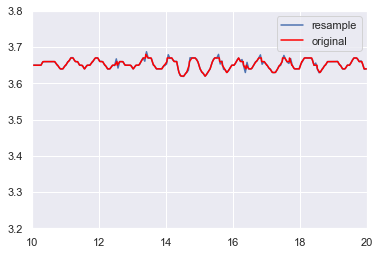

In [78]:
x,yy = smoothings_from_pd(df_sponge)

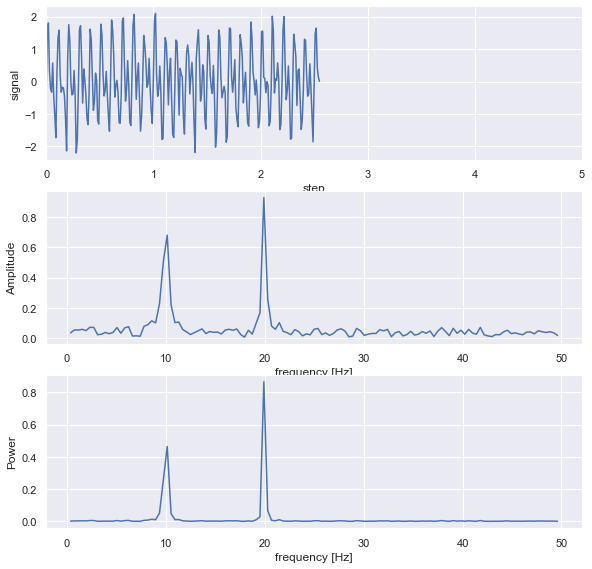

In [79]:
# 10Hzと20Hzがでていればよい

import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft, fftfreq

# データのパラメータ
N = 256            # サンプル数
dt = 0.01          # サンプリング間隔
sampling = 100
f1, f2 = 10, 20    # 周波数
t = np.arange(0, N*dt, dt)  # 時間軸
freq = np.linspace(0, 1.0/dt, N)  # 周波数軸

# 信号を生成（周波数10の正弦波+周波数20の正弦波+ランダムノイズ）
f = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) + 0.3 * np.random.randn(N)
# ナイキスト周波数
nyquist = sampling/2


# 周波数スケール
freq = fftfreq(N, dt)

F = fft(f)
# 正規化
F = F / (N / 2)

# 振幅スペクトルを計算
Amp = np.abs(F)
# パワースペクトルの計算（振幅スペクトルの二乗）
Pow = Amp ** 2

# ローパスフィルタ
F[(freq > nyquist)] = 0
# ハイパスフィルタ
# F[(freq < nyquist)] = 0

fig = plt.figure(figsize=(9.6, 9.6))

# 信号データ
ax1 = fig.add_subplot(311)
ax1.plot(t, f)
ax1.set_xlim([0, 5])
ax1.set_xlabel('step')
ax1.set_ylabel('signal')

# 振幅スペクトル
ax2 = fig.add_subplot(312)
ax2.plot(freq[1:N//2], Amp[1:N//2])
ax2.set_xlabel('frequency [Hz]')
ax2.set_ylabel('Amplitude')
# plt.xlim(0,100)

# パワースペクトル
ax3 = fig.add_subplot(313)
ax3.plot(freq[1:N//2], Pow[1:N//2])
ax3.set_xlabel('frequency [Hz]')
ax3.set_ylabel('Power')
# plt.xlim(0,30)

plt.show()

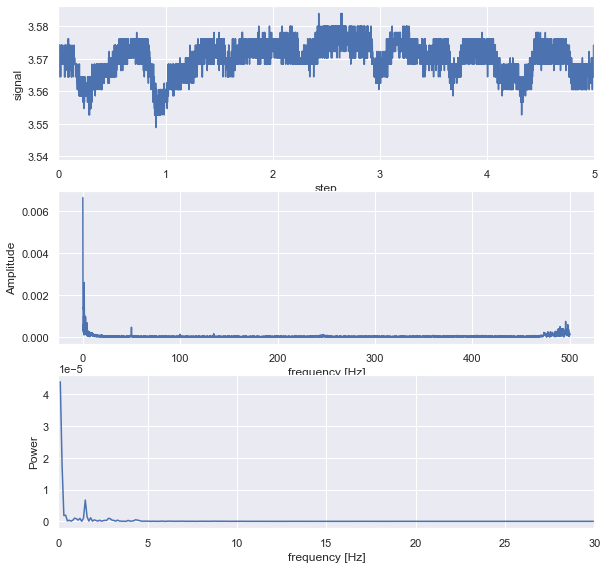

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft, fftfreq

# 標本数
N = 10000
# サンプリング間隔 (= 1 / サンプリング周波数)
dt =0.001
sampling = 1000
t = np.arange(0, N * dt, dt)
# ナイキスト周波数
nyquist = sampling/2

y = np.array(df_dan.iloc[:,1])

# 周波数スケール
freq = fftfreq(N, dt)

F = fft(y)
# 正規化
F = F / (N / 2)

# 振幅スペクトルを計算
Amp = np.abs(F)
# パワースペクトルの計算（振幅スペクトルの二乗）
Pow = Amp ** 2

# ローパスフィルタ
# F[(freq > nyquist)] = 0
# ハイパスフィルタ
# F[(freq < nyquist)] = 0

fig = plt.figure(figsize=(9.6, 9.6))

# 信号データ
ax1 = fig.add_subplot(311)
ax1.plot(t, y)
ax1.set_xlim([0, 5])
ax1.set_xlabel('step')
ax1.set_ylabel('signal')

# 振幅スペクトル
ax2 = fig.add_subplot(312)
ax2.plot(freq[1:N//2], Amp[1:N//2])
ax2.set_xlabel('frequency [Hz]')
ax2.set_ylabel('Amplitude')
# plt.xlim(0,100)

# パワースペクトル
ax3 = fig.add_subplot(313)
ax3.plot(freq[1:N//2], Pow[1:N//2])
ax3.set_xlabel('frequency [Hz]')
ax3.set_ylabel('Power')
plt.xlim(0,30)

plt.show()

In [80]:
yy

array([  3.65      ,   3.646278  ,   3.63547743,   3.64581301,
         3.65520494,   3.65056653,   3.66037928,   3.6680714 ,
         3.67811705,   3.67680579,   3.67000454,   3.66994062,
         3.66808138,   3.65986276,   3.65573955,   3.63133117,
         3.64000918,   3.64793889,   3.64996006,   3.65000118,
         3.66108401,   3.67223703,   3.66986804,   3.66993604,
         3.67002207,   3.66997284,   3.6700069 ,   3.66157129,
         3.64905324,   3.64976311,   3.65010206,   3.64999208,
         3.65000341,   3.64662218,   3.67380797,   3.67150227,
         3.67149865,   3.66841868,   3.65617739,   3.67737498,
         3.66983291,   3.66127633,   3.65795861,   3.6499991 ,
         3.64481557,   3.64052662,   3.649993  ,   3.64149372,
         3.67250418,   3.67967775,   3.68133507,   3.67677907,
         3.66951236,   3.66995625,   3.66434548,   3.65965811,
         3.65080005,   3.64719144,   3.63991061,   3.64671618,
         3.65136354,   3.64945709,   3.64879848,   3.66

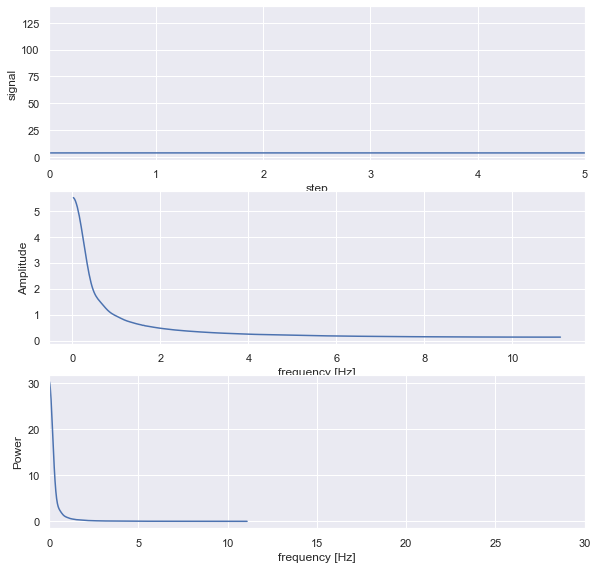

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft, fftfreq

# 標本数
N = 1000
# サンプリング間隔 (= 1 / サンプリング周波数)
dt =45/1000
sampling = 1000/45
t = np.arange(0, N * dt, dt)
# ナイキスト周波数
nyquist = sampling/2

y = np.array(y)

# 周波数スケール
freq = fftfreq(N, dt)

F = fft(y)
# 正規化
F = F / (N / 2)

# 振幅スペクトルを計算
Amp = np.abs(F)
# パワースペクトルの計算（振幅スペクトルの二乗）
Pow = Amp ** 2

# ローパスフィルタ
# F[(freq > nyquist)] = 0
# ハイパスフィルタ
# F[(freq < nyquist)] = 0

fig = plt.figure(figsize=(9.6, 9.6))

# 信号データ
ax1 = fig.add_subplot(311)
ax1.plot(t, y)
ax1.set_xlim([0, 5])
ax1.set_xlabel('step')
ax1.set_ylabel('signal')

# 振幅スペクトル
ax2 = fig.add_subplot(312)
ax2.plot(freq[1:N//2], Amp[1:N//2])
ax2.set_xlabel('frequency [Hz]')
ax2.set_ylabel('Amplitude')
# plt.xlim(0,100)

# パワースペクトル
ax3 = fig.add_subplot(313)
ax3.plot(freq[1:N//2], Pow[1:N//2])
ax3.set_xlabel('frequency [Hz]')
ax3.set_ylabel('Power')
plt.xlim(0,30)

plt.show()